<a href="https://colab.research.google.com/github/kevinCortial/graphlearning/blob/main/preprocessing_Harvard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


       id            x            y
0    0910  2713.388794  2416.424561
1    6103  2614.369629  2386.631348
2    6106  2583.115845  2490.073730
3    6108  2595.237549  2421.645508
4    0806  2496.602661  2819.347656
..    ...          ...          ...
861  3005  1769.458618  2122.589111
862  3913  1368.636841  2019.038025
863  3001  1397.348389  1952.072571
864  2941  1278.896362  2263.202148
865  2939  1554.937500  2808.760742

[866 rows x 3 columns]
     source  strength target
0      1602  0.536056   2309
1      1602  0.587606   3208
2      1602  0.544331   2106
3      1602  0.616316   2202
4      1602  0.518476   3921
...     ...       ...    ...
2527   2710  0.573539   3102
2528   2814  0.624391   3102
2529   2814  0.587945   2905
2530   2709  0.455420   2814
2531   2708  0.408248   8404

[2532 rows x 3 columns]
{'0101': (2075.9461669922, 2745.5568847656), '0102': (2153.6484375, 2519.5017089844), '0103': (1676.4609375, 2661.0825195312), '0104': (2318.2426757812, 2771.2937011719), 

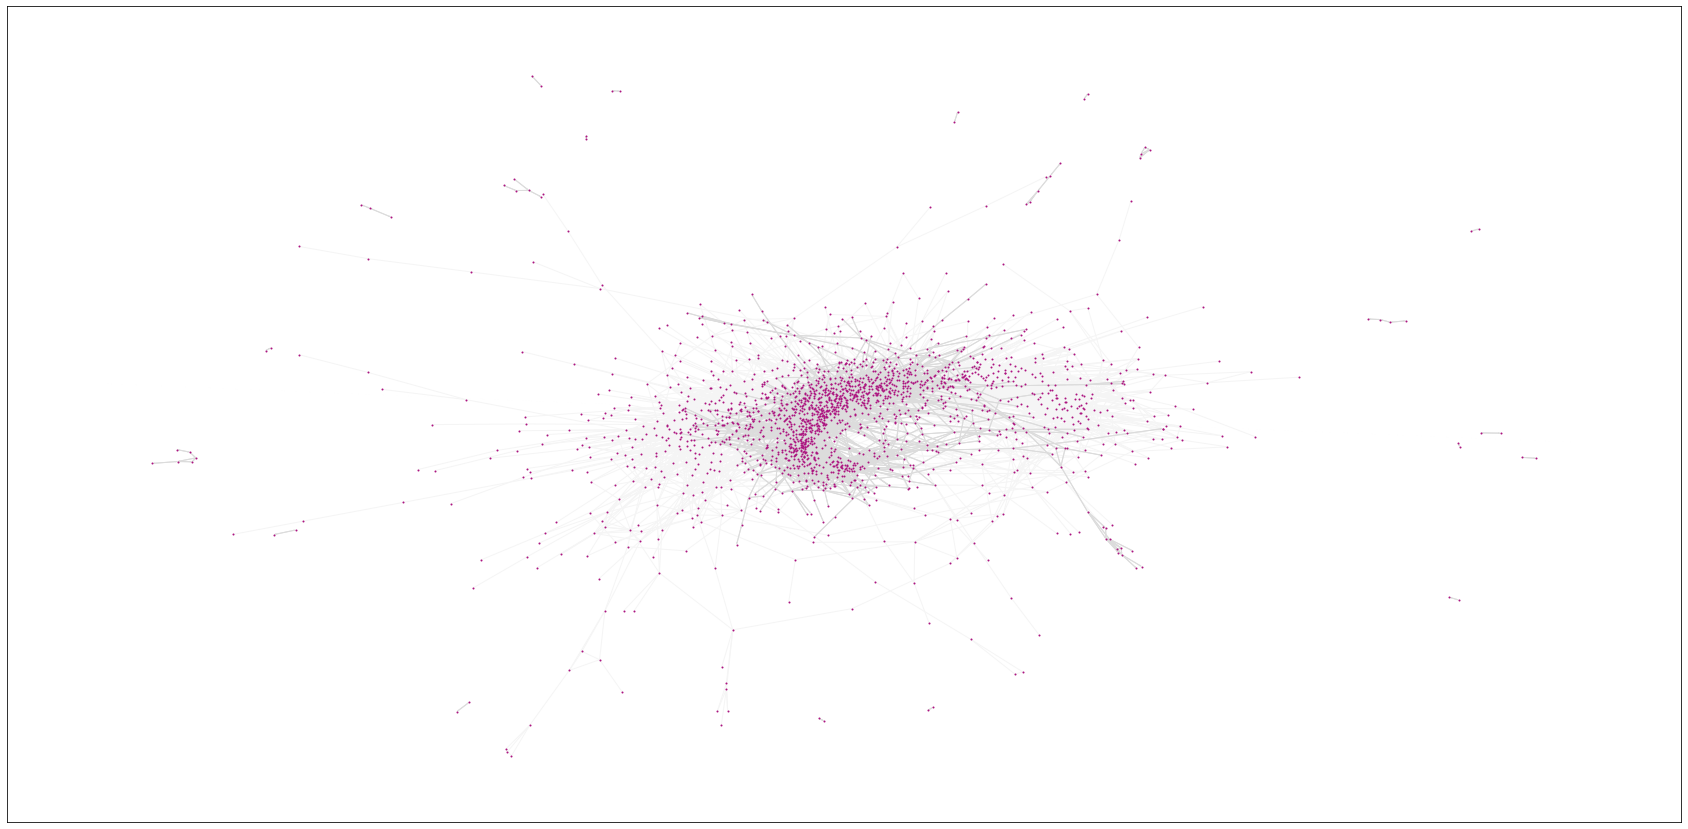

dict_items([('1201', 0.0014903129657228018), ('2304', 0.0014903129657228018), ('2508', 0.0014903129657228018), ('2601', 0.0014903129657228018), ('2603', 0.0014903129657228018), ('2604', 0.0014903129657228018), ('2607', 0.0014903129657228018), ('2608', 0.0014903129657228018), ('2701', 0.0014903129657228018), ('2704', 0.0014903129657228018), ('2713', 0.0014903129657228018), ('2809', 0.0014903129657228018), ('2825', 0.0014903129657228018), ('2827', 0.0014903129657228018), ('2835', 0.0014903129657228018), ('2836', 0.0014903129657228018), ('2841', 0.0014903129657228018), ('2904', 0.0014903129657228018), ('2929', 0.0014903129657228018), ('3207', 0.0014903129657228018), ('3901', 0.0014903129657228018), ('4104', 0.0014903129657228018), ('4107', 0.0014903129657228018), ('4809', 0.0014903129657228018), ('4907', 0.0014903129657228018), ('4909', 0.0014903129657228018), ('5105', 0.0014903129657228018), ('5701', 0.0014903129657228018), ('6214', 0.0014903129657228018), ('6506', 0.0014903129657228018)

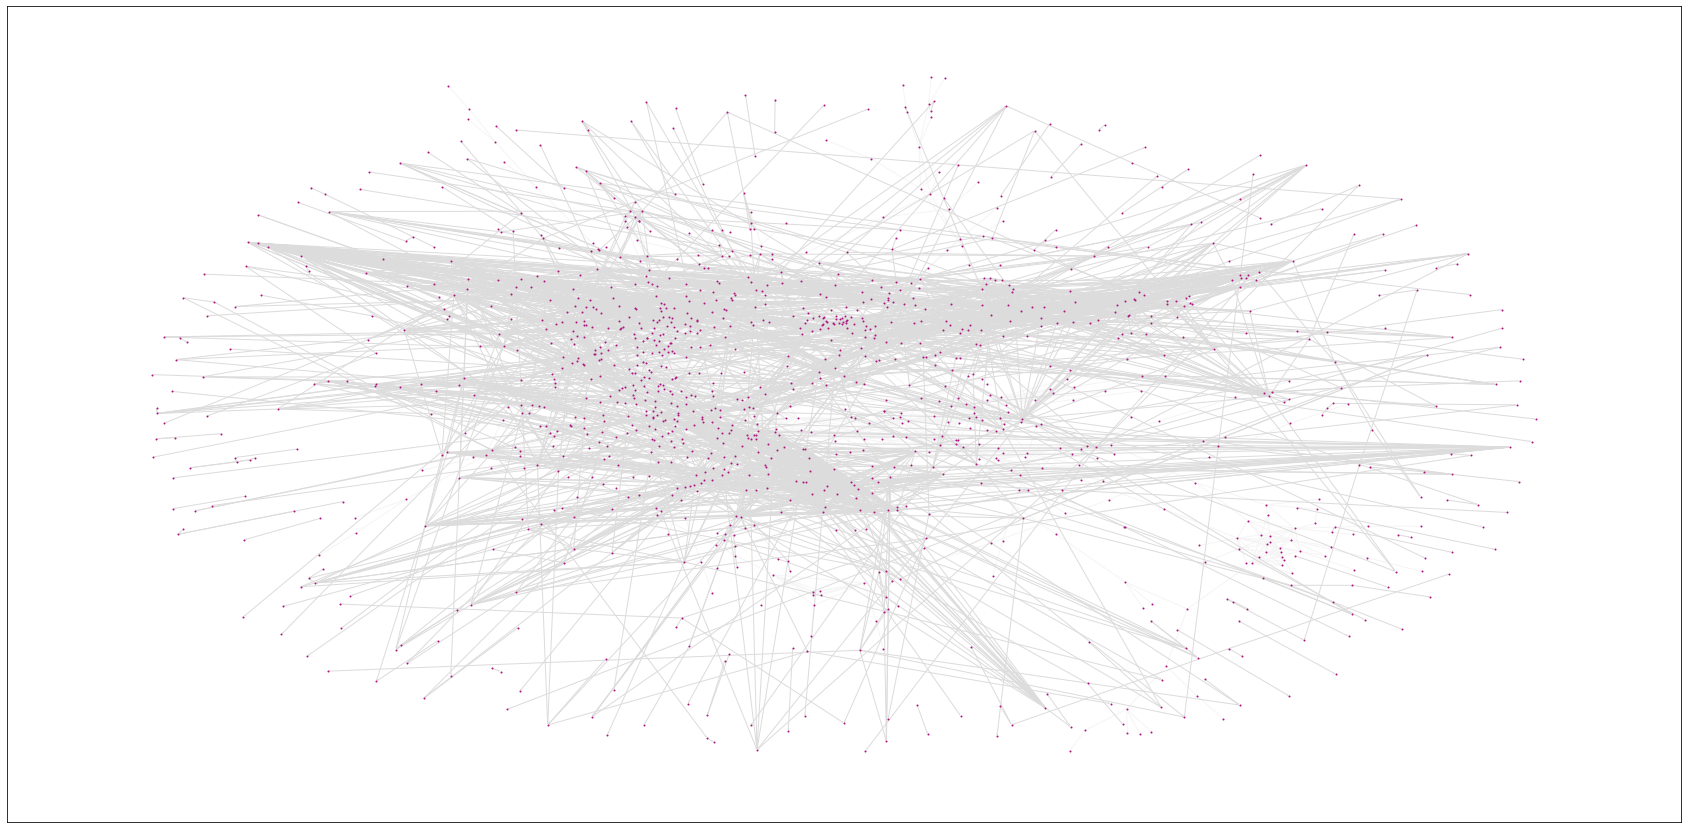

0.1666666667


In [ ]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# First file.json that contains two dataframes, one with nodes infos and the other with the edges
with open('/content/drive/MyDrive/ColabNotebooks/network_hs92_4digit.json') as json_data:
    data = json.load(json_data)
df_nodes = pd.DataFrame(data['nodes'])
print(df_nodes)
df_edges = pd.DataFrame(data['edges'])
print(df_edges)

# Dictionary of tuples that contains the positions (x, y) of every node
pos = df_nodes.set_index('id').apply(tuple, 1).groupby(level=0).agg(lambda x: x.values).to_dict()
print(pos)

#PART ONE, first dataframe:
def get_clean_graph_from_dataframe(dataframe):
  G = nx.from_pandas_adjacency(dataframe)
  
  centrality = nx.closeness_centrality(G)
  centrality_sort = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1])}
  print(centrality_sort.items())
  list_attached_nodes = [key for key, value in centrality_sort.items() if value < 0.1]
  # todo print liste des valeurs (centrality_sort.items())
  G.remove_nodes_from(list_attached_nodes)

  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=0.1, node_color='#ac1480', edge_color='whitesmoke')
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return G

def get_graph_from_dataframe(dataframe):
  # We only need the three needed columns
  dataframe = dataframe[["commoditycode_1", "commoditycode_2", "proximity"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe intro an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))

  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro')

  return dataframe


original_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/hs92_proximities.csv', delimiter = ",", dtype={"commoditycode_1": str, "commoditycode_2": str})
final_df = get_graph_from_dataframe(original_df)
G = get_clean_graph_from_dataframe(final_df)

# PART TWO, other dataframe (positions):
def get_clean_graph_from_dataframe_hs(dataframe):
  G = nx.from_pandas_adjacency(dataframe)
  
  centrality = nx.closeness_centrality(G)
  centrality_sort = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1])}
  print(centrality_sort.items())
  list_attached_nodes = [key for key, value in centrality_sort.items() if value < 0.06]
  # todo print liste des valeurs (centrality_sort.items())
  G.remove_nodes_from(list_attached_nodes)

  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=0.1, node_color='#ac1480', edge_color='whitesmoke')
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return G

def get_graph_from_dataframe_hs(dataframe, pos):
  # We only need the three needed columns
  dataframe = dataframe[["source", "target", "strength"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe intro an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))
  #nx.set_node_attributes(G, pos, 'coord')
  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro')

  return dataframe

original_df_positions = df_edges
df_positions = get_graph_from_dataframe_hs(original_df_positions, pos)
G_positions = get_clean_graph_from_dataframe_hs(df_positions)

print(original_df_positions['strength'].min())